In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm

/Users/mosky/.local/share/virtualenvs/Practicing_Python_3-G_R8ux9l/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load the Datasets In

* Star98: http://www.statsmodels.org/stable/datasets/generated/star98.html
* Fair: http://www.statsmodels.org/stable/datasets/generated/fair.html

In [3]:
star98_df = sm.datasets.star98.load_pandas().data
display(
    star98_df.iloc[:, :14].head(),
    star98_df.iloc[:, :14].tail(),
    star98_df.dtypes,
)

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,0.0,22.222220
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,0.0,0.000000
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,0.0,0.000000
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,0.0,7.142857
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0.0,0.000000


,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
298,96.0,246.0,62.23968,13.820860,3.956157,32.12879,15.884480,13.27089,52.88133,4.324174,20.98711,8.00000,0.0,18.181820
299,37.0,117.0,46.16188,1.150575,0.800400,45.62281,13.333330,11.80714,48.42615,3.945069,19.85830,53.77358,0.0,0.000000
300,208.0,387.0,43.41431,3.648564,1.541204,46.31998,21.377670,14.40468,53.79616,3.845481,22.70884,29.89247,0.0,6.666667
301,199.0,510.0,70.62104,20.461720,2.989345,17.42305,11.032860,16.56420,61.70566,3.970984,24.88647,15.14286,0.0,13.636360
302,72.0,84.0,77.74827,5.998899,9.576225,11.11723,7.874016,16.91871,65.09957,6.913397,20.03252,23.52941,0.0,0.000000


NABOVE                     float64
NBELOW                     float64
LOWINC                     float64
PERASIAN                   float64
PERBLACK                   float64
PERHISP                    float64
PERMINTE                   float64
AVYRSEXP                   float64
AVSALK                     float64
PERSPENK                   float64
PTRATIO                    float64
PCTAF                      float64
PCTCHRT                    float64
PCTYRRND                   float64
PERMINTE_AVYRSEXP          float64
PERMINTE_AVSAL             float64
AVYRSEXP_AVSAL             float64
PERSPEN_PTRATIO            float64
PERSPEN_PCTAF              float64
PTRATIO_PCTAF              float64
PERMINTE_AVYRSEXP_AVSAL    float64
PERSPEN_PTRATIO_PCTAF      float64
dtype: object

In [4]:
fair_df = sm.datasets.fair.load_pandas().data
display(
    fair_df.head(),
    fair_df.tail(),
    fair_df.dtypes,
)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

## Star98

### The Distribution of Variable –  `distplot`

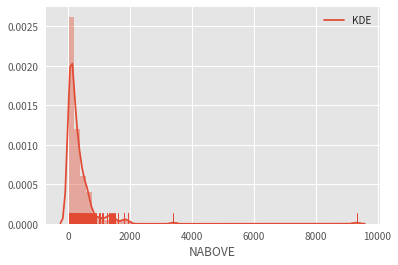

In [5]:
sns.distplot(
    star98_df.NABOVE,
    rug=True,
    kde_kws={'label': 'KDE'},
)

* x: the values.
* y: the percentage, and the univariate kernel density estimate (univariate KDE).

### Adjust Plotting Interactively – `plt`

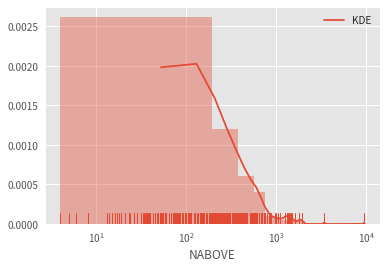

In [6]:
plt.xscale('log')
sns.distplot(
    star98_df.NABOVE,
    rug=True,
    kde_kws={'label': 'KDE'},
)

### The X-Y Relationship – `regplot`

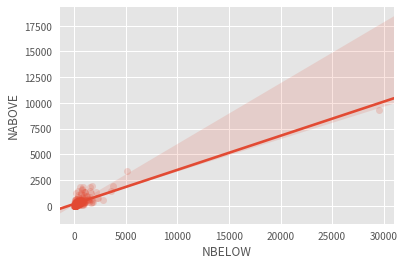

In [7]:
sns.regplot(
    data=star98_df,
    x='NBELOW', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

* Can x predict y?

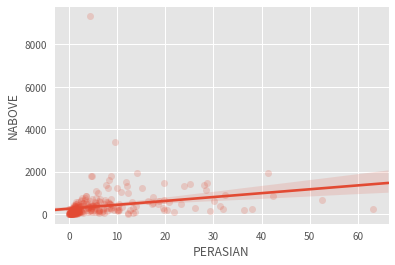

In [8]:
sns.regplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

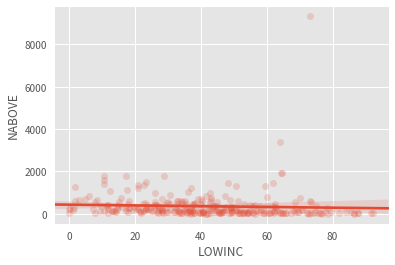

In [9]:
sns.regplot(
    data=star98_df,
    x='LOWINC', y='NABOVE',
    scatter_kws={'alpha': 0.2},
)

### The Relationships of Pairs – `pairplot`

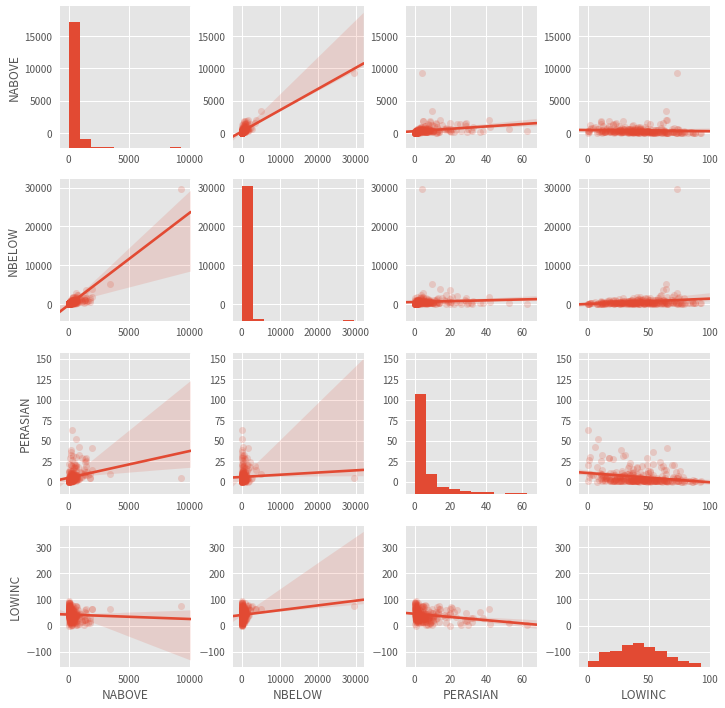

In [10]:
sns.pairplot(
    data=star98_df,
    vars=['NABOVE', 'NBELOW', 'PERASIAN', 'LOWINC'],
    kind='reg',
    plot_kws=dict(scatter_kws={'alpha': 0.2}),
)

### The Bivariate Relationship + Distributions – `jointplot`

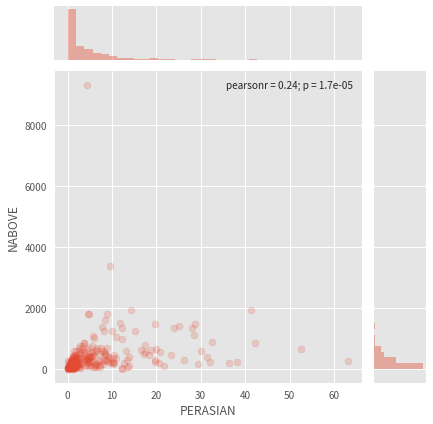

In [11]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='scatter',
    joint_kws={'alpha': 0.2},
)

- pearsonr: Pearson correlation coefficient.
    - = 0: no linear relationship.
    - \> 0.3: weak.
    - \> 0.5: moderate.
    - \> 0.7: strong.
    - = 1: perfect.
    - Can be negative linear relationship.
- p: p-value for testing non-correlation. p-value is P(reject H | H: true), i.e., the probability of making mistake.
    - < 0.001: extremely significant.
    - < 0.01: very significant.
    - < 0.05: significant.
    - ≥ 0.05: not significant.

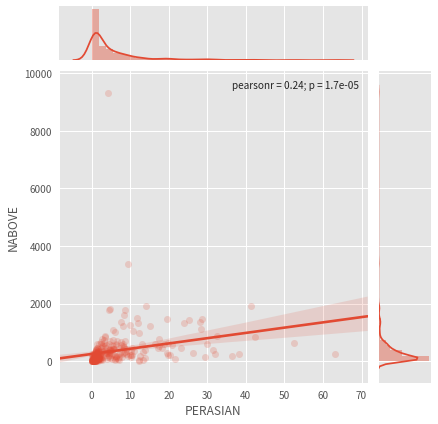

In [12]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='reg',
    joint_kws=dict(scatter_kws={'alpha': 0.2}),
)

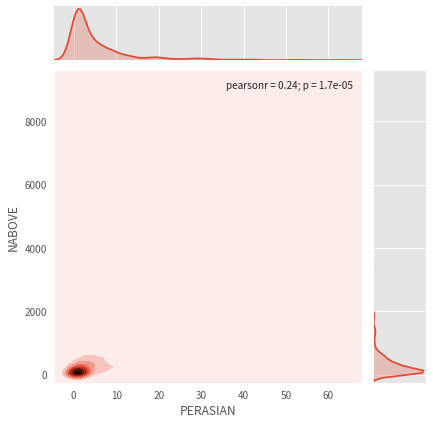

In [13]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='kde',  # kernel density estimate
)

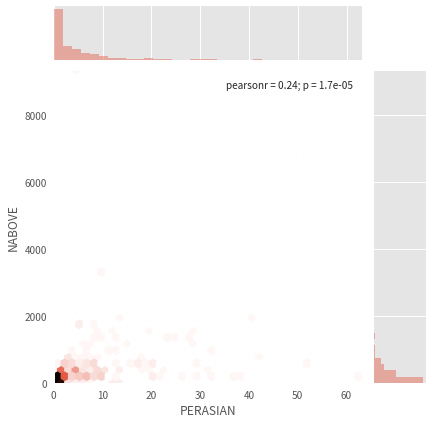

In [14]:
sns.jointplot(
    data=star98_df,
    x='PERASIAN', y='NABOVE',
    kind='hex',  # hexbin
)

## Fair

### The Overview of Variables – `boxplot`

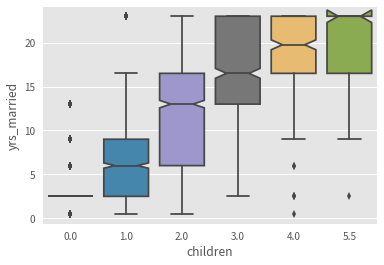

In [15]:
sns.boxplot(
    data=fair_df,
    x='children',
    y='yrs_married',
    notch=True
)

* Box: $Q_1$–$Q_3$ = 25th – 75th percentile = 50% of data.
* Line: the median = the 50th percentile.
* Whiskers:
   * $Q_1 - 1.5 IQR$, where $IQR = Q_3 - Q_1$.
   * $Q_3 + 1.5 IQR$.
   * = 99.3% of data if from a normal distribution.
* Notch: 95% confidence interval (CI) of normal distribution.
   * Here the CI comes from Gaussian-based asymptotic approximation with no bootstrap.
   * The CI also can be $ median \pm 1.57\dfrac{IQR}{\sqrt{n}} $.
   * If the notches don't overlap, significant.

### The Boxplots + Kernel Density Estimates – `violinplot`

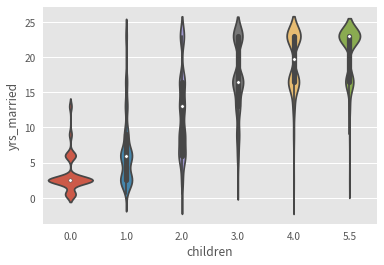

In [16]:
sns.violinplot(
    data=fair_df,
    x='children',
    y='yrs_married',
)

### The Faster Violinplot – `lvplot`

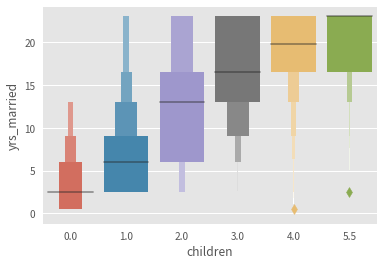

In [17]:
sns.lvplot(
    data=fair_df,
    x='children',
    y='yrs_married',
)

### The Point Estimates + Confidence Intervals – `barplot`

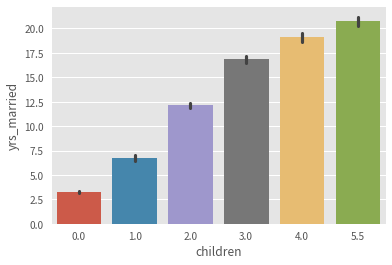

In [18]:
sns.barplot(
    data=fair_df,
    x='children',
    y='yrs_married',
)

* The height of a rectangle: an estimate of the mean from Gaussian-based asymptotic approximation by default.
* The bar: the 95% confident interval of the estimate with 1,000 bootstrap iterations by default.
    * If the bars don't overlap, significant.

### The Categorical Plots on Grid – `factorplot`

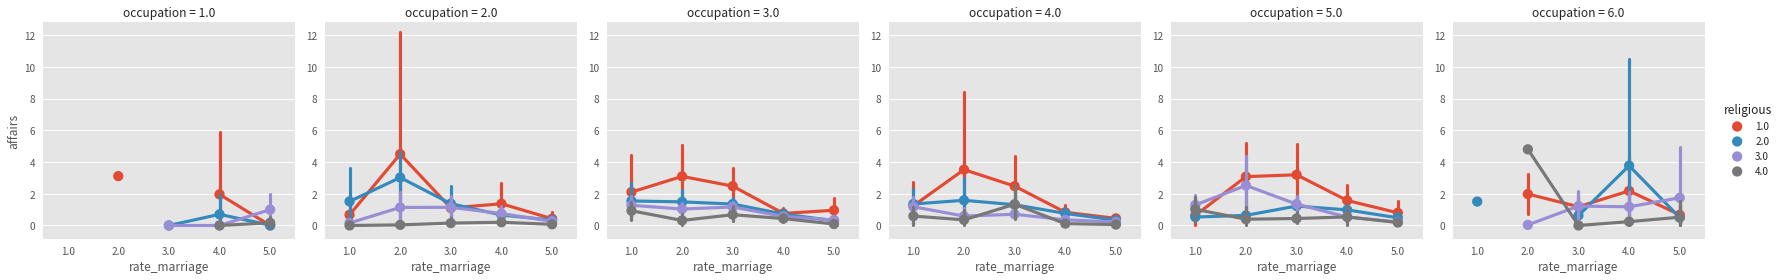

In [19]:
sns.factorplot(
    data=fair_df,
    y='affairs',
    x='rate_marriage',
    hue='religious',
    col='occupation',
)

## Dig More

* [API reference – seaborn](http://seaborn.pydata.org/api.html)
* [Plotting commands summary – matplotlib](https://matplotlib.org/api/pyplot_summary.html)
* [Boxplot - matplotlib](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)
* [Notched Box Plots – David's Statistics](https://sites.google.com/site/davidsstatistics/home/notched-box-plots)
* [Pearson correlation coefficient – Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
* [P-value – Wikipedia](https://en.wikipedia.org/wiki/P-value)